<a href="https://colab.research.google.com/github/CoderZIE/ApproximateMultiplier/blob/main/MAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

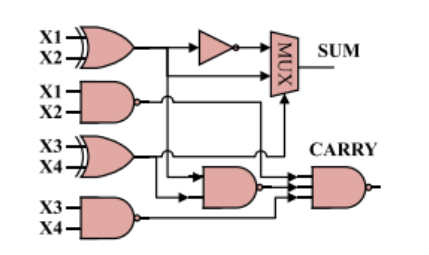

In [1]:
#defining basic gates

def nor_gate(a, b):
    if a == 0 and b == 0:
        return 1
    else:
        return 0

def not_gate(a):
    return 1 if a == 0 else 0

def and_gate(a, b):
    return 1 if a == 1 and b == 1 else 0

def nand_gate(a, b):
    return 0 if a == 1 and b == 1 else 1

def xor_gate(a, b):
    return 1 if a != b else 0

def or_gate(a, b):
    return 1 if a == 1 or b == 1 else 0

def mux(sel, data0, data1):
    if sel == 0:
        return data0
    elif sel == 1:
        return data1
    else:
        return None


def full_adder(A, B, Cin):

    S = A ^ B ^ Cin
    Cout = (A & B) | (B & Cin) | (Cin & A)

    return S, Cout

#defining accurate compressor
def accurateCompressor(a,b,c,d,cin):

  tempSum, cout = full_adder(a,b,c)
  result, carry = full_adder(tempSum,d,cin)

  return result,carry,cout

#defining approximate 4:2 compressor

def approximateCompressor(a,b,c,d):

  temp1 = xor_gate(a,b)
  temp2 = nand_gate(a,b)
  temp3 = xor_gate(c,d)
  temp4 = nand_gate(c,d)

  temp5 = nand_gate(temp1,temp3)
  temp6 = not_gate(temp1)
  temp7 = and_gate(temp2,temp4)

  #sum
  sum = mux(temp3,temp1,temp6)

  #carry
  carry = nand_gate(temp7,temp5)

  return sum,carry

In [2]:
print(accurateCompressor(0,0,1,1,1))
print(approximateCompressor(0,0,1,1))

(1, 1, 0)
(0, 1)


In [3]:
#16 bit adder
def adder_16bit(a, b):

    carry = 0
    result = []

    for i in range(15, -1, -1):
        bit_a = int(a[i])
        bit_b = int(b[i])

        # Perform a full adder operation
        sum_bit = (bit_a ^ bit_b) ^ carry
        carry = (bit_a & bit_b) | (carry & (bit_a ^ bit_b))

        result.insert(0, str(sum_bit))

    return ''.join(result)

#half adder
def half_adder(a, b):

    sum_out = a ^ b
    carry_out = a & b
    return sum_out, carry_out

In [4]:
#19 bit adder
def adder_19bit(a, b):

    carry = 0
    result = []

    for i in range(18, -1, -1):
        bit_a = int(a[i])
        bit_b = int(b[i])

        # Perform a full adder operation
        sum_bit = (bit_a ^ bit_b) ^ carry
        carry = (bit_a & bit_b) | (carry & (bit_a ^ bit_b))

        result.insert(0, str(sum_bit))

    return ''.join(result)

In [5]:
# take a as activation and b as weights

def approximate_multiplier(a, b):

    #reversing the list
    a = a[::-1]
    b = b[::-1]

    # Ensure both input values have 8 bits
    if len(a) != 8 or len(b) != 8:
        return "Inputs should be 8-bit binary values"

    # Initialize an 8x8 partial product array with zeros
    partial_products = [[0] * 8 for _ in range(8)]

    # Generate the partial products
    for i in range(8):
        for j in range(8):
            partial_products[i][j] = int(a[i]) & int(b[j])


    #applying signed to Partial products

    partial_products[7][0] = not_gate(partial_products[7][0])
    partial_products[7][1] = not_gate(partial_products[7][1])
    partial_products[7][2] = not_gate(partial_products[7][2])
    partial_products[7][3] = not_gate(partial_products[7][3])
    partial_products[7][4] = not_gate(partial_products[7][4])
    partial_products[7][5] = not_gate(partial_products[7][5])
    partial_products[7][6] = not_gate(partial_products[7][6])

    partial_products[0][7] = not_gate(partial_products[0][7])
    partial_products[1][7] = not_gate(partial_products[1][7])
    partial_products[2][7] = not_gate(partial_products[2][7])
    partial_products[3][7] = not_gate(partial_products[3][7])
    partial_products[4][7] = not_gate(partial_products[4][7])
    partial_products[5][7] = not_gate(partial_products[5][7])
    partial_products[6][7] = not_gate(partial_products[6][7])

    for i in range(0,7):
      temp = partial_products[7][i]
      partial_products[7][i]= partial_products[i][7]
      partial_products[i][7]=temp



    #Stage 1 compression

    s1,c1 = full_adder(partial_products[4][0],partial_products[3][1],0)

    s2,c2 = approximateCompressor(partial_products[5][0],partial_products[4][1],partial_products[3][2],partial_products[2][3])

    s3,c3 = approximateCompressor(partial_products[6][0],partial_products[5][1],partial_products[4][2],partial_products[3][3])
    s4,c4 = full_adder(partial_products[2][4],partial_products[1][5],0)

    s5,c5 = approximateCompressor(partial_products[7][0],partial_products[6][1],partial_products[5][2],partial_products[4][3])
    s6,c6,cout1 = accurateCompressor(partial_products[3][4],partial_products[2][5],partial_products[1][6],partial_products[0][7],0)

    s7,c7 = approximateCompressor(1,partial_products[7][1],partial_products[6][2],partial_products[5][3])
    s8,c8,cout2 = accurateCompressor(partial_products[4][4],partial_products[3][5],partial_products[2][6],partial_products[1][7],c5)

    s9,c9 = approximateCompressor(partial_products[7][2],partial_products[6][3],partial_products[5][4],partial_products[4][5])
    s10,c10 = full_adder(partial_products[3][6],partial_products[2][7],c7)

    s11,c11 = approximateCompressor(partial_products[7][3],partial_products[6][4],partial_products[5][5],partial_products[4][6])

    s12,c12 = full_adder(partial_products[7][4],partial_products[6][5],0)

    #stage2 compression

    s13,c13 = full_adder(partial_products[2][0],partial_products[1][1],0)

    s14,c14 = approximateCompressor(partial_products[3][0],partial_products[2][1],partial_products[1][2],partial_products[0][3])

    s15,c15 = approximateCompressor(s1,partial_products[2][2],partial_products[1][3],partial_products[0][4])

    s16,c16 = approximateCompressor(s2,c1,partial_products[1][4],partial_products[0][5])

    s17,c17 = approximateCompressor(s3,c2,s4,partial_products[0][6])

    s18,c18 = approximateCompressor(s6,c4,c3,s5)

    s19,c19 = approximateCompressor(cout1,s7,s8,c6)

    s20,c20,cout3 = accurateCompressor(c8,s9,s10,cout2,0)

    s21,c21,cout4 = accurateCompressor(s11,c9,c10,partial_products[3][7],cout3)

    s22,c22,cout5 = accurateCompressor(s12,c11,partial_products[5][6],partial_products[4][7],cout4)

    s23,c23,cout6 = accurateCompressor(c12,partial_products[7][5],partial_products[6][6],partial_products[5][7],cout5)

    s24,c24 = full_adder(partial_products[7][6],partial_products[6][7],cout6)

    #stage 3 (16 bit adder)

    a=[0,partial_products[0][1],partial_products[0][2],c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,0]
    b=[partial_products[0][0],partial_products[1][0],s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,partial_products[7][7],1]

    a = a[::-1]
    b = b[::-1]


    a = ''.join(map(str, a))
    b = ''.join(map(str, b))



    result = adder_16bit(a,b)

    # print("s1,c1", s1,c1)
    # print("s2,c2", s2,c2)
    # print("s3,c3", s3,c3)
    # print("s4,c4", s4,c4)
    # print("s5,c5", s5,c5)
    # print("s6,c6,cout1", s6,c6,cout1)
    # print("s7,c7",s7,c7)
    # print("s8,c8,cout2",s8,c8,cout2)
    # print("s9,c9",s9,c9)
    # print("s10,c10",s10,c10)
    # print("s11,c11",s11,c11)
    # print("s12,c12",s12,c12)
    # print("s13,c13",s13,c13)
    # print("s14,c14",s14,c14)
    # print("s15,c15",s15,c15)
    # print("s16,c16",s16,c16)
    # print("s17,c17",s17,c17)
    # print("s18,c18",s18,c18)
    # print("s19,c19",s19,c19)
    # print("s20,c20",s20,c20,cout3)
    # print("s21,c21",s21,c21,cout4)
    # print("s22,c22",s22,c22,cout5)
    # print("s23,c23",s23,c23,cout6)
    # print("s24,c24",s24,c24)

    return result


In [6]:
#sign extension

def extend_sign_bit(number_str):

    sign_bit = number_str[0]
    extended_number = sign_bit + number_str

    return extended_number


#16 bit Dadda Reduction unit

def reduction(a,b,c,d,e,f,g,h):

  # Extend the sign bit for each 16-bit number
  a = extend_sign_bit(a)
  b = extend_sign_bit(b)
  c = extend_sign_bit(c)
  d = extend_sign_bit(d)
  e = extend_sign_bit(e)
  f = extend_sign_bit(f)
  g = extend_sign_bit(g)
  h = extend_sign_bit(h)


  sum=[0] * 19
  carry=[0] * 19

  sum2=[0] * 19
  carry2=[0] * 19

  cout=[0]*19
  cout2=[0]*19

  #stage 1

  #8 approximate Compressor

  for i in range(16,12,-1):
    sum[i],carry[i]= approximateCompressor(int(a[i]),int(b[i]),int(c[i]),int(d[i]))
    sum2[i],carry2[i]= approximateCompressor(int(e[i]),int(f[i]),int(g[i]),int(h[i]))

  #26 accurate Compressor

  for i in range(12,0,-1):
    sum[i],carry[i],cout[i]= accurateCompressor(int(a[i]),int(b[i]),int(c[i]),int(d[i]),cout[i+1])
    sum2[i],carry2[i],cout2[i]= accurateCompressor(int(e[i]),int(f[i]),int(g[i]),int(h[i]),cout2[i+1])

  #stage 2

  sum3=[0] * 19
  carry3=[0] * 19
  cout3=[0]*19

  a=[]
  b=[]


  for i in range(15,12,-1):
    sum3[i],carry3[i]= approximateCompressor(sum[i],sum2[i],carry[i+1],carry2[i+1])


  for i in range(12,0,-1):
    sum3[i],carry3[i],cout3[i]= accurateCompressor(sum[i],sum2[i],carry[i+1],carry2[i+1],cout3[i+1])

  s,c,ct = accurateCompressor(cout[0],cout2[0],carry[0],carry2[0],cout3[0])

  a.append(c)
  b.append(ct)

  a.append(s)
  b.append(carry3[0])

  for i in range(0,16):
    a.append(sum3[i])
    b.append(carry3[i+1])

  a.append(sum[16])
  b.append(sum2[16])

  a = ''.join(map(str, a))
  b = ''.join(map(str, b))

  result = adder_19bit(a,b)

  return result





In [7]:
#Algorithm to check outputs of approximate multiplier

def decimal_to_binary_and_twos_complement(decimal_num, num_bits):
    # Check if the number is negative
    is_negative = decimal_num < 0

    # Calculate the binary representation of the absolute value
    binary_repr = bin(abs(decimal_num))[2:].zfill(num_bits)

    # If the number is negative, calculate its two's complement
    if is_negative:
        # Invert the bits (change 0s to 1s and 1s to 0s)
        inverted = ''.join('1' if bit == '0' else '0' for bit in binary_repr)

        # Add 1 to the inverted value to get the two's complement
        carry = 1
        twos_complement = ''
        for bit in reversed(inverted):
            if bit == '0' and carry == 1:
                twos_complement = '1' + twos_complement
                carry = 0
            elif bit == '1' and carry == 1:
                twos_complement = '0' + twos_complement
            else:
                twos_complement = bit + twos_complement

        return twos_complement
    else:
        # If the number is positive, no need to calculate two's complement
        return binary_repr

# Example usage
a = 2
b = 2

answerAccurate = a*b
num_bits = 8  # Replace with the number of bits you want in the binary representation

a = decimal_to_binary_and_twos_complement(a, num_bits)
b = decimal_to_binary_and_twos_complement(b, num_bits)

answer = decimal_to_binary_and_twos_complement(answerAccurate, 2*num_bits)
answerApproximate = approximate_multiplier(a,b)


print("Accurate Answer:   ", answer)
print("Approximate Answer:", answerApproximate)
print("Accurate Answer:   ", int(answer, 2))
print("Approximate Answer:", int(answerApproximate, 2))



Accurate Answer:    0000000000000100
Approximate Answer: 0000000000000100
Accurate Answer:    4
Approximate Answer: 4


In [8]:
#Comparing the accurate and approximate reduction unit

a=2
b=3
c=9
d=9
e=6
f=7
g=120
h=9

accurateAnswer = a + b + c + d + e + f + g + h

a = decimal_to_binary_and_twos_complement(a, 16)
b = decimal_to_binary_and_twos_complement(b, 16)
c = decimal_to_binary_and_twos_complement(c, 16)
d = decimal_to_binary_and_twos_complement(d, 16)
e = decimal_to_binary_and_twos_complement(e, 16)
f = decimal_to_binary_and_twos_complement(f, 16)
g = decimal_to_binary_and_twos_complement(g, 16)
h = decimal_to_binary_and_twos_complement(h, 16)

approximateAnswer = reduction(a,b,c,d,e,f,g,h)


print("Accurate Answer:",decimal_to_binary_and_twos_complement(accurateAnswer, 19))
print("Approximate Answer:",approximateAnswer)

Accurate Answer: 0000000000010100101
Approximate Answer: 0000000000010100101


In [9]:
#converting binary to decimal

def twos_complement_to_decimal(binary_str):
  #   Check if the number is negative
    is_negative = binary_str[0] == '1'

    # If negative, find the two's complement
    if is_negative:
      #   Invert the bits
      inverted_bits = ''.join('1' if bit == '0' else '0' for bit in binary_str[1:])

        # Add 1 to the inverted bits
      binary_str = bin(int(inverted_bits, 2) + 1)[2:]

    # Convert binary to decimal
    decimal_value = int(binary_str, 2)

    # Apply the negative sign if needed
   # -decimal_value if is_negative else
    return -decimal_value if is_negative else decimal_value

In [10]:
#Calculating the Errors for unsigned numbers

num_bits = 8  # Replace with the number of bits you want in the binary representation

MED = 0
MRED = 0
ED=0
n=0
ACC = 0

for i in range(50,112):
  for j in range(0,127):
    n=n+1
    r = i*j
    a = decimal_to_binary_and_twos_complement(i, num_bits)
    b = decimal_to_binary_and_twos_complement(j, num_bits)
    rd = approximate_multiplier(a,b)
    rd = twos_complement_to_decimal(rd)
    MED = MED + abs(r-rd)
    if(rd!=r):
      ED=ED+1
    if(r != 0):
      MRED = MRED + abs(abs(r-rd)/r)
      ACC = ACC + (1-(abs(r-rd)/r))

ED = ED /n

MED = MED/n
MRED = MRED/n
ACC = ACC/n
print("MED Error for unsigned numbers:",MED)
print("MRED Error for unsigned numbers:",MRED)
print("ACC",ACC)
print("decimal", rd)
print("Ed", ED)
print("n",n)

MED Error for unsigned numbers: 37.998475996951996
MRED Error for unsigned numbers: 0.008324055089565066
ACC 0.9838019291624023
decimal 13442
Ed 0.0920751841503683
n 7874


In [ ]:
#Calculating error of reduction unit for signed numbers

MED = 0
MRED = 0
num = 0

limit = 100

for i in range(0,limit):
  for j in range(i,limit):
    for k in range(j,limit):
      for l in range(k,limit):
        for m in range(l,limit):
          for n in range(m,limit):
            for o in range(n,limit):
              for p in range(o,limit):

                num=num+1
                rf = i + j + k + l + m + n + o + p

                a = decimal_to_binary_and_twos_complement(i, 16)
                b = decimal_to_binary_and_twos_complement(j, 16)
                c = decimal_to_binary_and_twos_complement(k, 16)
                d = decimal_to_binary_and_twos_complement(l, 16)
                e = decimal_to_binary_and_twos_complement(m, 16)
                f = decimal_to_binary_and_twos_complement(n, 16)
                g = decimal_to_binary_and_twos_complement(o, 16)
                h = decimal_to_binary_and_twos_complement(p, 16)

                rd = reduction(a,b,c,d,e,f,g,h)
                rd = twos_complement_to_decimal(rd)

                MED = MED + abs(rf-rd)
                if(rf != 0):
                  MRED = MRED + abs(rf-rd)/rf



MED = MED/num
MRED = MRED/num
print("MED Error for unsigned numbers:",MED)
print("MRED Error for unsigned numbers:",MRED)


In [ ]:
#Calculating the Errors for signed numbers

num_bits = 8  # Replace with the number of bits you want in the binary representation

MED = 0
MRED = 0
n=0
ACC = 0

for i in range(-127,128):
  for j in range(-127,128):
        n=n+1
        r = i*j
        a = decimal_to_binary_and_twos_complement(i, num_bits)
        b = decimal_to_binary_and_twos_complement(j, num_bits)
        rd = approximate_multiplier(a,b)
        rd = twos_complement_to_decimal(rd)
        MED = MED + abs(r-rd)
        if(r != 0):
          MRED = MRED + abs(abs((r-rd)/r))
          ACC = ACC + (1-(abs(r-rd)/r))

MED = MED/n
MRED = MRED/n
ACC = ACC/n
print("ACC",ACC)
print("MED Error for signed numbers:",MED)
print("MRED Error for signed numbers:",MRED)

ACC 0.8883391648835969
MED Error for signed numbers: 69.24302960399847
MRED Error for signed numbers: 0.25913781626927507
